**RESUME CATEGORIZATION
**

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import seaborn as sns

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
org_dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/HR_dataset.csv")

In [62]:
resumeDataSet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/HR_dataset.csv")
resumeDataSet['cleaned_resume'] = ''  #add new column
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Frontend Developer,"As a seasoned Frontend Developer, I have a pro...",
1,Backend Developer,With a solid background in Backend Development...,
2,Python Developer,"As a Python Developer, I leverage my expertise...",
3,Data Scientist,"With a background in Data Science, I possess a...",
4,Frontend Developer,Experienced Frontend Developer with a passion ...,


In [63]:
resumeDataSet.Category.unique()   #individual categories

array(['Frontend Developer', 'Backend Developer', 'Python Developer',
       'Data Scientist', 'Full Stack Developer',
       'Mobile App Developer (iOS/Android)', 'Machine Learning Engineer',
       'Cloud Engineer'], dtype=object)

In [64]:
resumeDataSet["Category"].value_counts() #the number of records in each category

,count
Category,
Backend Developer,57
Cloud Engineer,56
Frontend Developer,54
Data Scientist,53
Full Stack Developer,47
Python Developer,45
Mobile App Developer (iOS/Android),45
Machine Learning Engineer,43


<Axes: xlabel='count', ylabel='Category'>

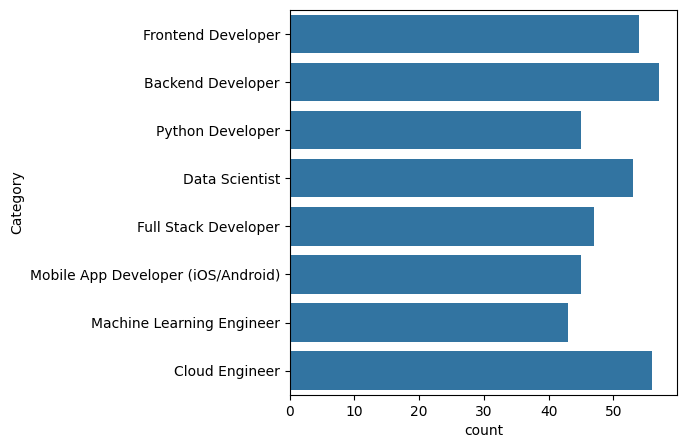

In [65]:
#show the count of observations in each category
plt.figure(figsize=(5,5))
sns.countplot(y="Category", data=resumeDataSet)

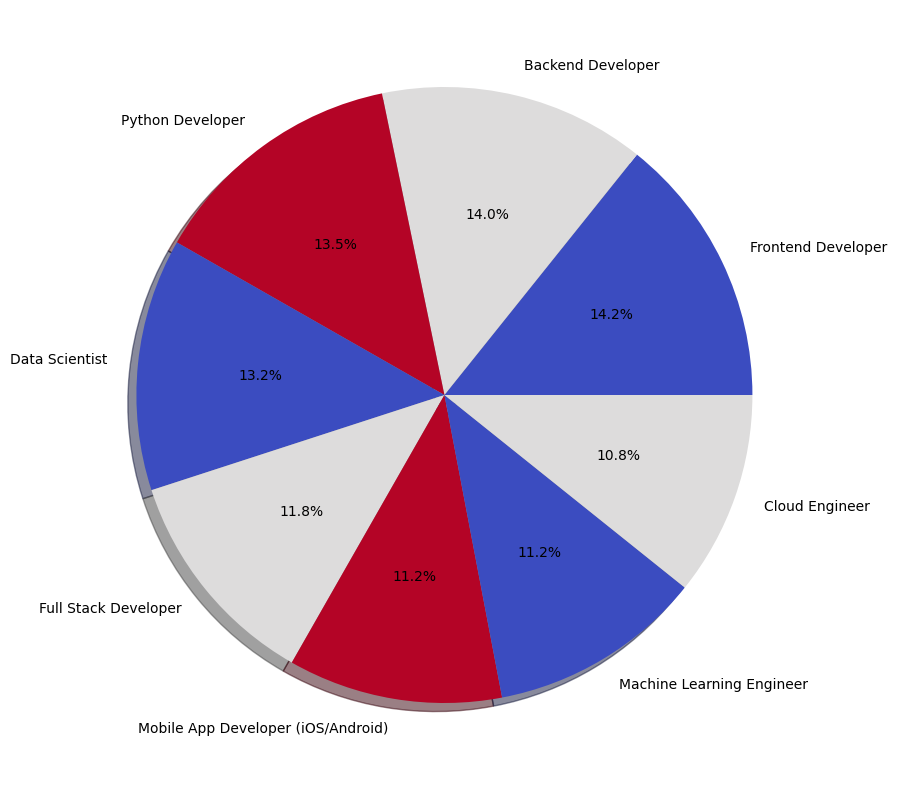

In [66]:
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
plt.figure(1, figsize=(10,10))

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

CLEAN

In [67]:
import re


import nltk
nltk.download('all')

from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

In [68]:
def cleanResume(resumeText):
  url_patern = re.compile(r'https?://\S+|www\.\S+')
  email_pattern = re.compile(r'b[A-Za-z0-9.%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b')
  cleanText = url_patern.sub(r'', resumeText)
  cleanText = email_pattern.sub(r'', cleanText)

  cleanText = re.sub('[^\w\s]', '', cleanText)  # remove URLs
  stop_words = set(stopwords.words('english'))
  cleanText = ' '.join([word for word in cleanText.split() if word.lower() not in stop_words])
  return cleanText

In [69]:
print(resumeDataSet['Resume'][1])

With a solid background in Backend Development, I bring over 7 years of experience in building robust and scalable server-side applications. My expertise lies in designing and implementing RESTful APIs using frameworks such as Node.js and Express.js, coupled with databases like MongoDB, PostgreSQL, and MySQL. I am proficient in writing efficient and optimized code that ensures fast response times and high performance. Moreover, I have extensive experience in cloud technologies, having deployed applications on platforms like AWS, Google Cloud, and Microsoft Azure. My strong problem-solving skills enable me to tackle complex architectural challenges and optimize database queries for improved efficiency. I am a proactive team player who thrives in fast-paced environments, capable of collaborating with cross-functional teams to deliver solutions that meet both technical requirements and business objectives.


In [70]:
# apply cleanResume to the dataset
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
print(resumeDataSet['cleaned_resume'][1])

solid background Backend Development bring 7 years experience building robust scalable serverside applications expertise lies designing implementing RESTful APIs using frameworks Nodejs Expressjs coupled databases like MongoDB PostgreSQL MySQL proficient writing efficient optimized code ensures fast response times high performance Moreover extensive experience cloud technologies deployed applications platforms like AWS Google Cloud Microsoft Azure strong problemsolving skills enable tackle complex architectural challenges optimize database queries improved efficiency proactive team player thrives fastpaced environments capable collaborating crossfunctional teams deliver solutions meet technical requirements business objectives


ENCODING

In [71]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(resumeDataSet.Category)
print(le.classes_)
resumeDataSet['Category'] = le.transform(resumeDataSet.Category)

['Backend Developer' 'Cloud Engineer' 'Data Scientist'
 'Frontend Developer' 'Full Stack Developer' 'Machine Learning Engineer'
 'Mobile App Developer (iOS/Android)' 'Python Developer']


In [72]:
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,3,"As a seasoned Frontend Developer, I have a pro...",seasoned Frontend Developer proven track recor...
1,0,With a solid background in Backend Development...,solid background Backend Development bring 7 y...
2,7,"As a Python Developer, I leverage my expertise...",Python Developer leverage expertise Python pro...
3,2,"With a background in Data Science, I possess a...",background Data Science possess unique blend a...
4,3,Experienced Frontend Developer with a passion ...,Experienced Frontend Developer passion craftin...


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer()
word_vectorizer.fit(resumeDataSet["Resume"])
resume = word_vectorizer.transform(resumeDataSet["Resume"])

In [74]:
X_train,X_test,y_train,y_test = train_test_split(resume,resumeDataSet["Category"], test_size=0.2, random_state=50)
print(X_train.shape)
print(X_test.shape)

(320, 1169)
(80, 1169)


In [75]:
models = {
    "KNearestNeighbors": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "SVC": SVC(),
    "MultinomialNB": MultinomialNB(),
    "OneVsRestClassifier": OneVsRestClassifier(KNeighborsClassifier()),
}

In [76]:
accuracy_scores = {}

for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_scores[model_name] = accuracy

  print(f"Accuracy of {model_name} on test data: {accuracy}")

Accuracy of KNearestNeighbors on test data: 0.9625
Accuracy of LogisticRegression on test data: 1.0
Accuracy of RandomForestClassifier on test data: 1.0
Accuracy of SVC on test data: 1.0
Accuracy of MultinomialNB on test data: 0.975
Accuracy of OneVsRestClassifier on test data: 0.9625


In [77]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of KNeighbors Classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print(f"Accuracy of KNeighbors Classifier on test data: {accuracy}")


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test data: 0.9625


In [78]:
# list first 7 records of Category = 0 /Backend Developer/
resumeDataSet.loc[lambda resumeDataSet: resumeDataSet['Category'] == 0].head(7)

,Category,Resume,cleaned_resume
1,0,With a solid background in Backend Development...,solid background Backend Development bring 7 y...
6,0,Seasoned Backend Developer with a proven track...,Seasoned Backend Developer proven track record...
7,0,Dynamic Backend Developer with a passion for b...,Dynamic Backend Developer passion building sca...
13,0,Experienced Backend Developer with a focus on ...,Experienced Backend Developer focus building s...
18,0,Seasoned Backend Developer with a focus on arc...,Seasoned Backend Developer focus architecting ...
23,0,Experienced Backend Developer with a focus on ...,Experienced Backend Developer focus building s...
94,0,Results-driven Backend Developer with expertis...,Resultsdriven Backend Developer expertise desi...


In [79]:
# predict the category of record with number 23
test_resume = resumeDataSet.cleaned_resume[23]
input_features = word_vectorizer.transform([test_resume])
prediction_id = clf.predict(input_features)[0]
prediction_id

np.int64(0)

In [80]:
# list first records
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,3,"As a seasoned Frontend Developer, I have a pro...",seasoned Frontend Developer proven track recor...
1,0,With a solid background in Backend Development...,solid background Backend Development bring 7 y...
2,7,"As a Python Developer, I leverage my expertise...",Python Developer leverage expertise Python pro...
3,2,"With a background in Data Science, I possess a...",background Data Science possess unique blend a...
4,3,Experienced Frontend Developer with a passion ...,Experienced Frontend Developer passion craftin...


In [81]:
print("Category Mapping:", dict(zip(le.classes_,range(len(le.classes_)))))

Category Mapping: {'Backend Developer': 0, 'Cloud Engineer': 1, 'Data Scientist': 2, 'Frontend Developer': 3, 'Full Stack Developer': 4, 'Machine Learning Engineer': 5, 'Mobile App Developer (iOS/Android)': 6, 'Python Developer': 7}


In [82]:
# list first 5 records of Category = 5 /Machine Learning Engineer/
resumeDataSet.loc[lambda resumeDataSet: resumeDataSet['Category'] == 5].head(5)

,Category,Resume,cleaned_resume
43,5,Results-driven Machine Learning Engineer with ...,Resultsdriven Machine Learning Engineer solid ...
44,5,Passionate Machine Learning Engineer with a st...,Passionate Machine Learning Engineer strong fo...
45,5,Innovative Machine Learning Engineer with a pa...,Innovative Machine Learning Engineer passion s...
46,5,Dynamic Machine Learning Engineer with a backg...,Dynamic Machine Learning Engineer background c...
47,5,Experienced Machine Learning Engineer with a s...,Experienced Machine Learning Engineer strong b...


In [83]:
# predict the category of record with number 45
test_resume = resumeDataSet.cleaned_resume[45]
input_features = word_vectorizer.transform([test_resume])
prediction_id = clf.predict(input_features)[0]
prediction_id

np.int64(5)

In [84]:
# list first 5 records of Category = 7 /Python Developer/
resumeDataSet.loc[lambda resumeDataSet: resumeDataSet['Category'] == 7].head(5)

,Category,Resume,cleaned_resume
2,7,"As a Python Developer, I leverage my expertise...",Python Developer leverage expertise Python pro...
8,7,Experienced Python Developer with a strong bac...,Experienced Python Developer strong background...
9,7,Passionate Python Developer with a focus on bu...,Passionate Python Developer focus building rob...
14,7,Passionate Python Developer with a focus on ba...,Passionate Python Developer focus backend deve...
19,7,Passionate Python Developer with a focus on bu...,Passionate Python Developer focus building sca...


In [85]:
# predict the category of record with number 19
test_resume = resumeDataSet.cleaned_resume[19]
input_features = word_vectorizer.transform([test_resume])
prediction_id = clf.predict(input_features)[0]
prediction_id

np.int64(7)